## Import Libraries we want to use

In [2]:
import pandas as pd
#For virtualization
import seaborn as sns
import matplotlib.pyplot as plt
# For Normalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Loading and Combining Datasets "red and white" wine
##### load  winequality-red data

In [4]:
# Load the red wine dataset
red_wine = pd.read_csv('winequality-red.csv', sep=';')

# new column type/class of wine
red_wine['type'] = 'red'

red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


##### load  winequality-white data

In [6]:
# Load the white wine dataset
white_wine = pd.read_csv('winequality-white.csv', sep=';')

# new column type/class of wine
white_wine['type'] = 'white'

white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


##### data Integration "combine"

In [8]:
# Combine the datasets
dataset = pd.concat([red_wine, white_wine], ignore_index=True)
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


## Data Preprocessing 
### Some Exploration

In [10]:
dataset.describe()  # describing columns in dataset ..  provides a summary of each feature, including mean, standard deviation, and quartiles.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [11]:
dataset.shape #size of dataset

(6497, 13)

In [12]:
dataset.info()  # information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [13]:
# rename some coulmn to make simple in use
dataset.rename(columns={
    'fixed acidity': 'fixed_acidity',
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid',
    'residual sugar': 'residual_sugar',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide',
    'pH': 'ph',
}, inplace=True)

dataset.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [14]:
# Check the distribution of the 'quality' column
dataset['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

### Checking for missing and Duplicate values
#### Data Cleaning: Explore and Handling Missing Values

In [16]:
dataset.isnull().sum() #sum of null values
# can handel using dataset.fillna(dataset.mean(), inplace=True) 

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

#### Explore Duplication

In [18]:
dataset.duplicated().sum() # sum of duplicated values

1177

In [19]:
dataset[dataset.duplicated()] # display the duplicated rows

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,red
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,red
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000,5,red
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,5,red
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.900000,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6427,6.4,0.230,0.35,10.30,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5,white
6449,7.0,0.360,0.35,2.50,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6,white
6450,6.4,0.330,0.44,8.90,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5,white
6455,7.1,0.230,0.39,13.70,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6,white


In [20]:
# shape (6497, 13) index 0 for rows , index 1 for coulmn
# Calculate the percentage of duplicated rows
percent_duplicated = (dataset.duplicated().sum() / dataset.shape[0]) * 100

print(f'The percentage of duplicated rows is: {percent_duplicated:.2f}%')

The percentage of duplicated rows is: 18.12%


####  Data Cleaning: Handle Duplicates
##### Removing duplicates help in prevent biases in model training and evaluation "So Improved Model Performance"

In [22]:
dataset = dataset.drop_duplicates(keep='first')  # remove duplicates but keeping the first occurrence of row
dataset

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


### Some Visulaiztion
#### more understanding dataset

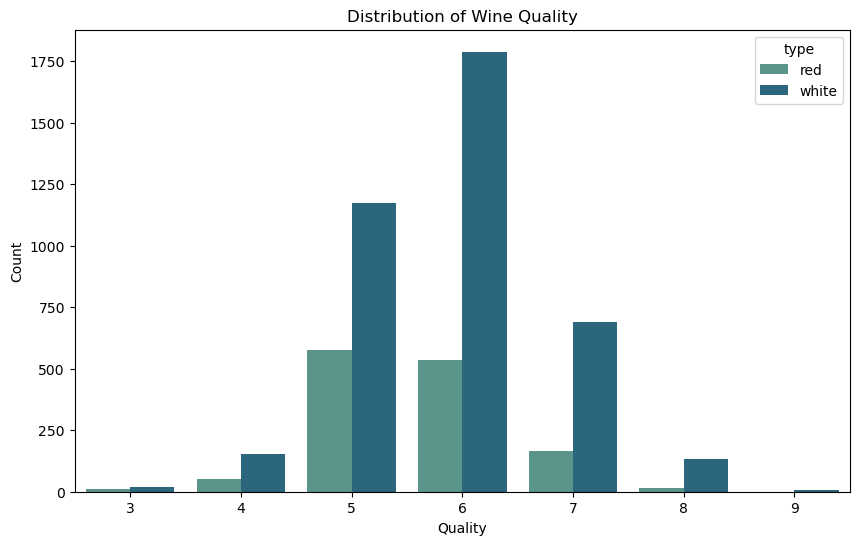

In [24]:
# Create a figure with a specific size 10 * 6
plt.figure(figsize=(10, 6))

# Create a count plot for the 'quality' column, with a hue based on the 'type' column
sns.countplot(data=dataset, x='quality', hue='type', palette="crest")

# title of the plot
plt.title('Distribution of Wine Quality')
#label for x axis
plt.xlabel('Quality')
#label for y axis
plt.ylabel('Count')

plt.show() # shows the distribution of wine rows for each quality rating.
# so understand how many wines fall into each quality category

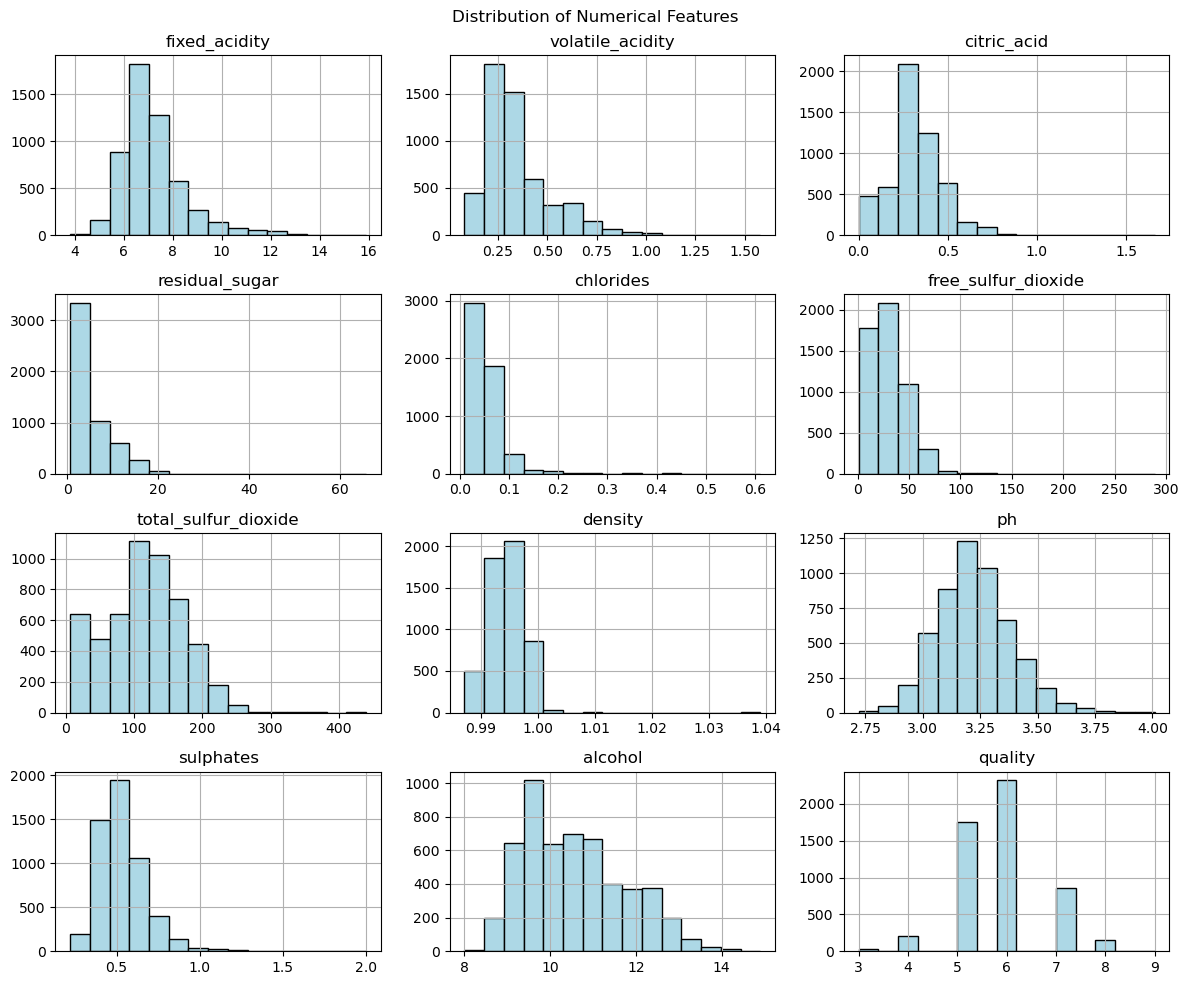

In [25]:
# Plot histograms for numerical features
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset[numeric_columns].hist(bins=15, figsize=(12, 10), color='lightblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout() 
plt.show()

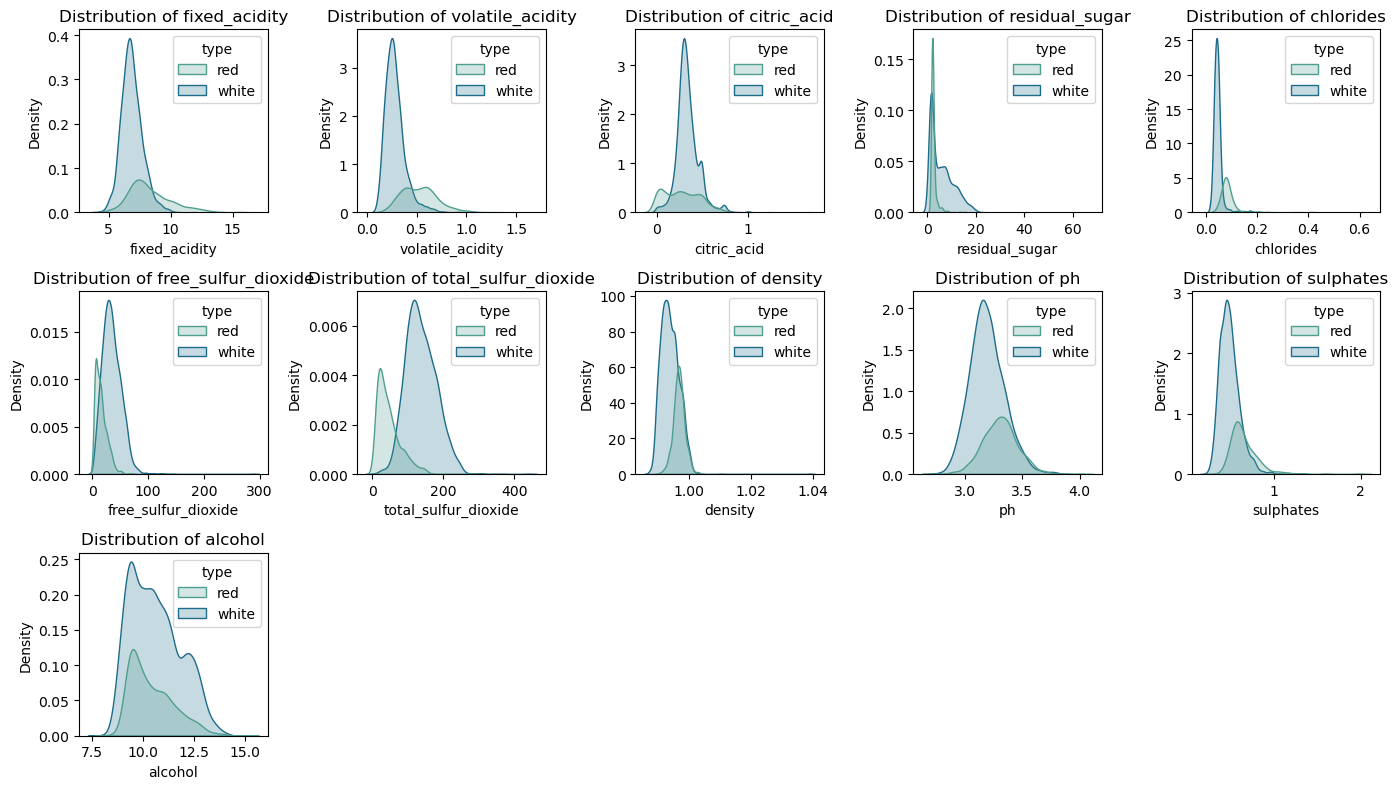

In [26]:
# Comparison of features between red and white wines
plt.figure(figsize=(14, 8))
# kdeplot to all columns in the dataset except the last two columns. index (i) and column name (column).
for i, column in enumerate(dataset.columns[:-2], 1): # expet quality and type
    plt.subplot(3, 5, i) # display in 3 rows and 5 columns
    sns.kdeplot(data=dataset, x=column, hue='type', fill=True, palette='crest')
    plt.title(f'Distribution of {column}')
plt.tight_layout() #spacing between subplots
plt.show()                                                               

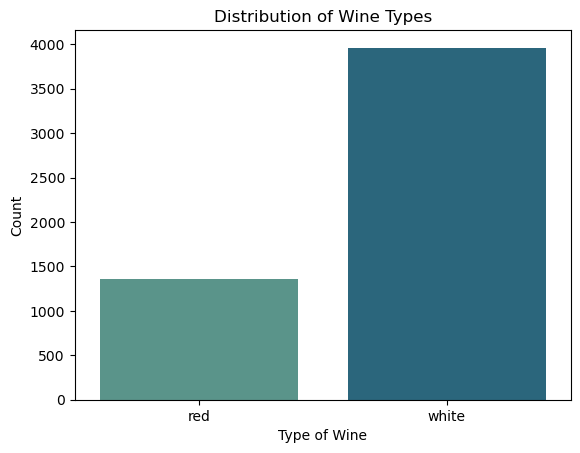

In [27]:
# Count plot for categorical variable 'type'
sns.countplot(x='type', data=dataset, hue='type', palette="crest")
plt.title('Distribution of Wine Types')
plt.xlabel('Type of Wine')
plt.ylabel('Count')
plt.show()

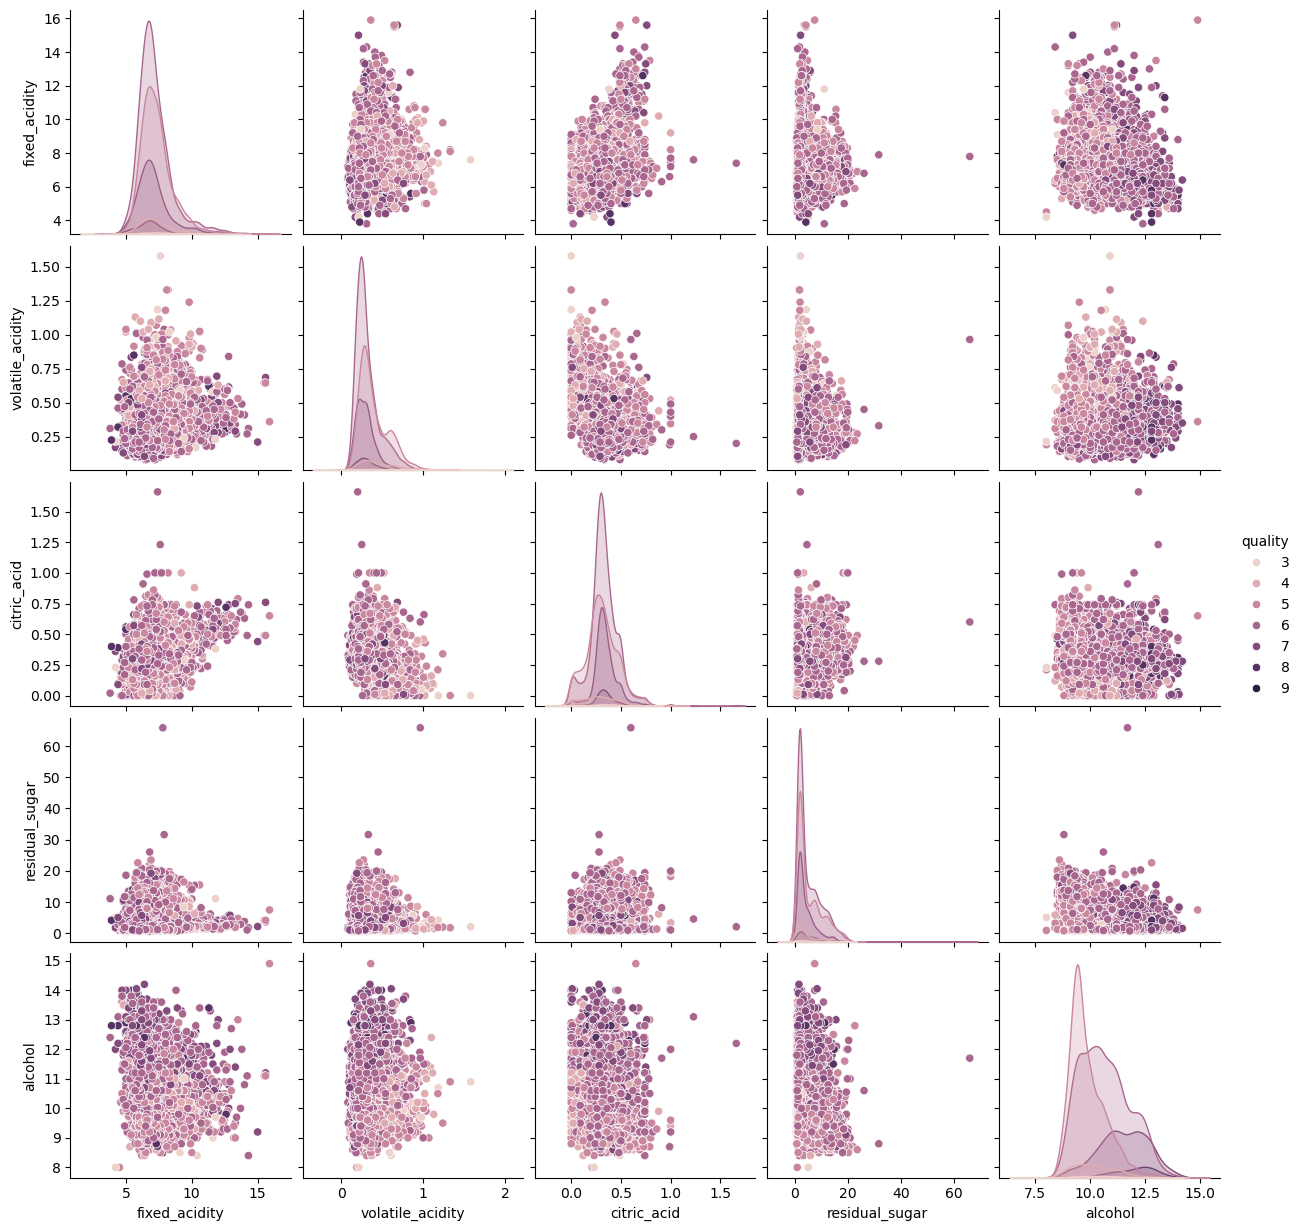

In [28]:
# Pair plot some features
selected_features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'alcohol', 'quality']
sns.pairplot(dataset[selected_features], hue='quality')
plt.show()

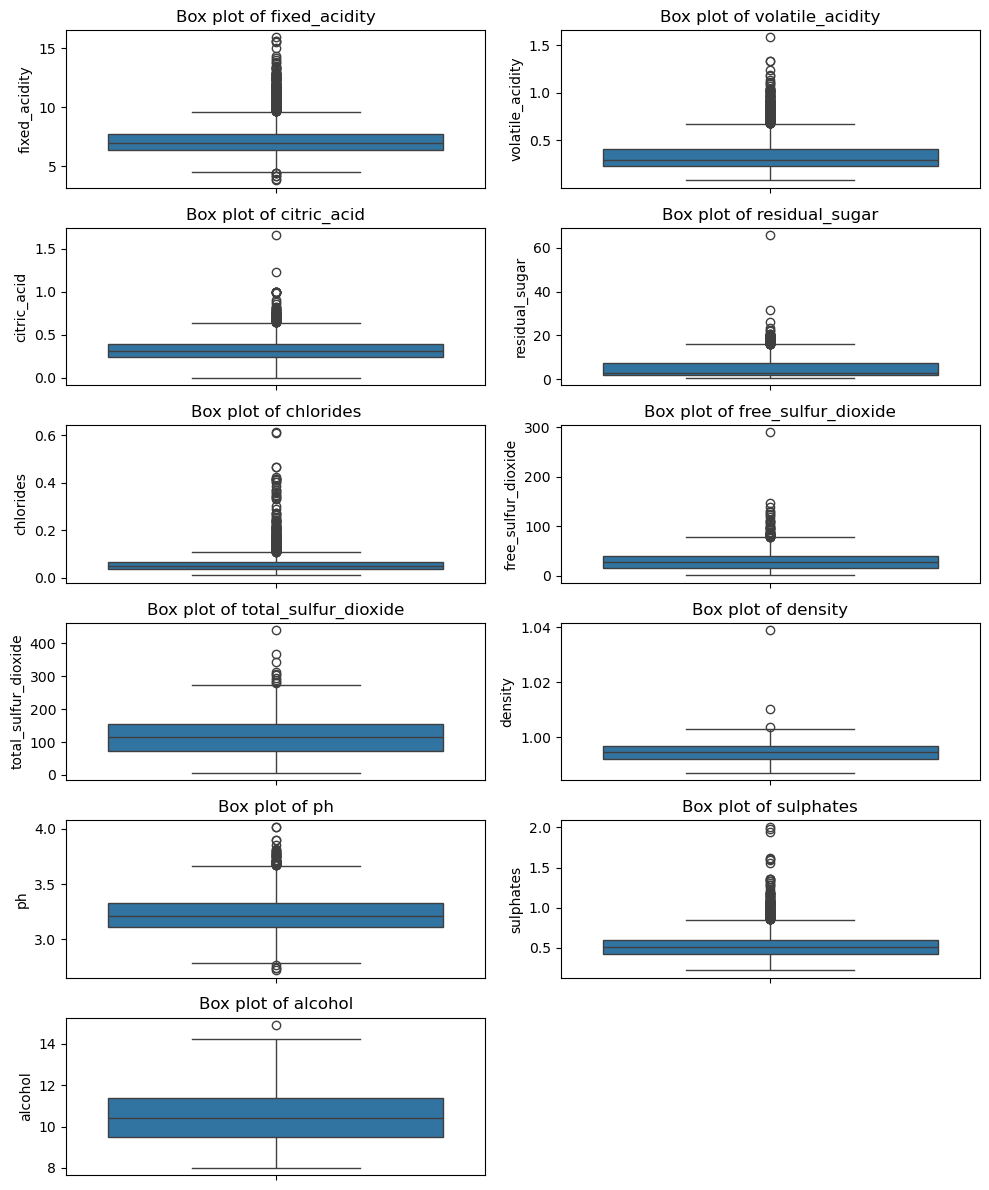

In [29]:
plt.figure(figsize=(10,12))
# Box blot all columns in the dataset except the last two columns ('quality' and 'type') 
for i, column in enumerate(dataset.columns[:-2], 1):
    plt.subplot(6,2, i) # Display in 4 rows and 3columns 
    sns.boxplot(data=dataset, y=column) 
    plt.title(f'Box plot of {column}') # title to each box plot
plt.tight_layout() # Adjust spacing between subplots 
plt.show()

## Handel Outliers

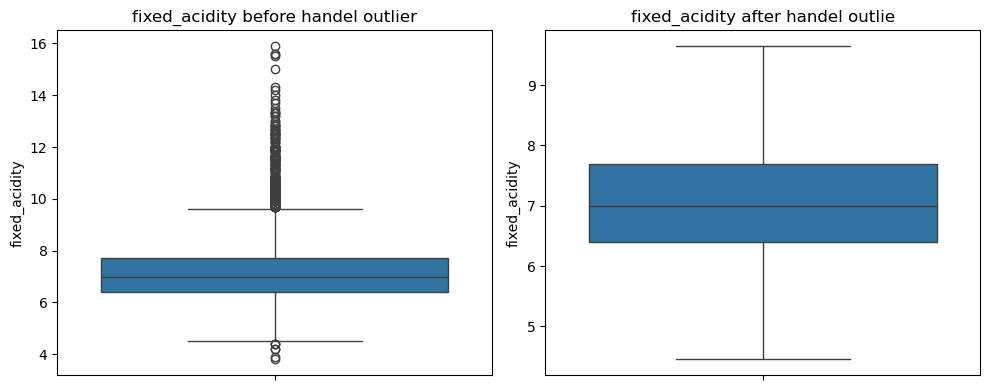

In [31]:
# before handling outliers
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.boxplot(data=dataset, y='fixed_acidity', ax=axs[0])
axs[0].set_title('fixed_acidity before handel outlier')

# Handle fixed_acidity column
# Step 1: Remove 2 maximum outliers -- delete max outliers
indices = dataset['fixed_acidity'].nlargest(2).index
dataset = dataset.drop(indices)

# Step 2: Calculate IQR and cap other outliers

# Calculate the IQR for restecg - interquartile range measure of  spread of the data
Q1 = dataset['fixed_acidity'].quantile(0.25)  # Q1 represents the value below which 25% of the data points fall.
Q3 = dataset['fixed_acidity'].quantile(0.75)  # Q3 represents the value below which 75% of the data points fall.
IQR = Q3 - Q1

# lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values outside the bounds
dataset.loc[dataset['fixed_acidity'] < lower_bound, 'fixed_acidity'] = lower_bound
dataset.loc[dataset['fixed_acidity'] > upper_bound, 'fixed_acidity'] = upper_bound

# after handling outliers
sns.boxplot(data=dataset, y='fixed_acidity', ax=axs[1])
axs[1].set_title('fixed_acidity after handel outlie')

plt.tight_layout()
plt.show()

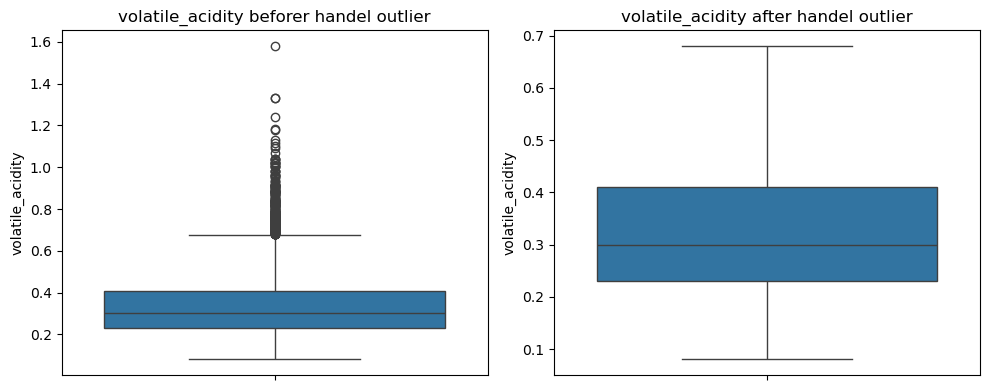

In [32]:
# before handling outliers
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.boxplot(data=dataset, y='volatile_acidity', ax=axs[0])
axs[0].set_title('volatile_acidity beforer handel outlier')

# Handle volatile_acidity column
# Step 1: Remove maximum outliers
indices = dataset['volatile_acidity'].nlargest(1).index
dataset = dataset.drop(indices)

# Step 2: Calculate IQR and cap other outliers
Q1 = dataset['volatile_acidity'].quantile(0.25)
Q3 = dataset['volatile_acidity'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values outside the bounds
dataset.loc[dataset['volatile_acidity'] < lower_bound, 'volatile_acidity'] = lower_bound
dataset.loc[dataset['volatile_acidity'] > upper_bound, 'volatile_acidity'] = upper_bound

# after handling outliers
sns.boxplot(data=dataset, y='volatile_acidity', ax=axs[1])
axs[1].set_title('volatile_acidity after handel outlier')

plt.tight_layout()
plt.show()

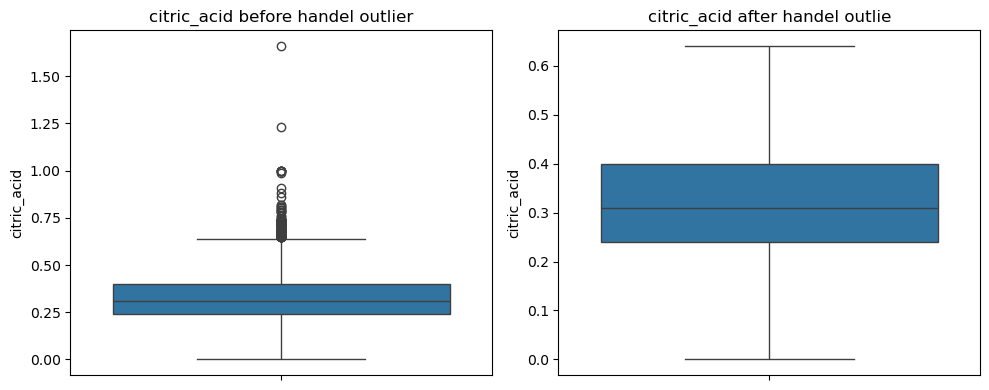

In [33]:
# before handling outliers
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.boxplot(data=dataset, y='citric_acid', ax=axs[0])
axs[0].set_title('citric_acid before handel outlier')

# Handle citric_acid column
# Step 1: Remove 3 maximum outliers
indices = dataset['citric_acid'].nlargest(3).index
dataset = dataset.drop(indices)

# Step 2: Calculate IQR and cap other outliers
Q1 = dataset['citric_acid'].quantile(0.25)
Q3 = dataset['citric_acid'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values outside the bounds
dataset.loc[dataset['citric_acid'] < lower_bound, 'citric_acid'] = lower_bound
dataset.loc[dataset['citric_acid'] > upper_bound, 'citric_acid'] = upper_bound

# after handling outliers
sns.boxplot(data=dataset, y='citric_acid', ax=axs[1])
axs[1].set_title('citric_acid after handel outlie')

plt.tight_layout()
plt.show()

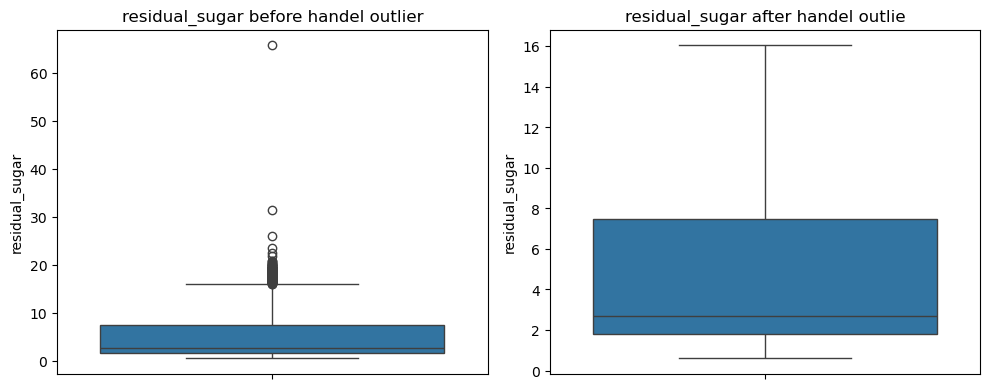

In [34]:
# before handling outliers
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.boxplot(data=dataset, y='residual_sugar', ax=axs[0])
axs[0].set_title('residual_sugar before handel outlier')

# Handle residual_sugar column
# Step 1: Remove maximum outliers
indices = dataset['residual_sugar'].nlargest(1).index
dataset = dataset.drop(indices)

# Step 2: Calculate IQR and cap other outliers
Q1 = dataset['residual_sugar'].quantile(0.25)
Q3 = dataset['residual_sugar'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values outside the bounds
dataset.loc[dataset['residual_sugar'] < lower_bound, 'residual_sugar'] = lower_bound
dataset.loc[dataset['residual_sugar'] > upper_bound, 'residual_sugar'] = upper_bound

# after handling outliers
sns.boxplot(data=dataset, y='residual_sugar', ax=axs[1])
axs[1].set_title('residual_sugar after handel outlie')

plt.tight_layout()
plt.show()

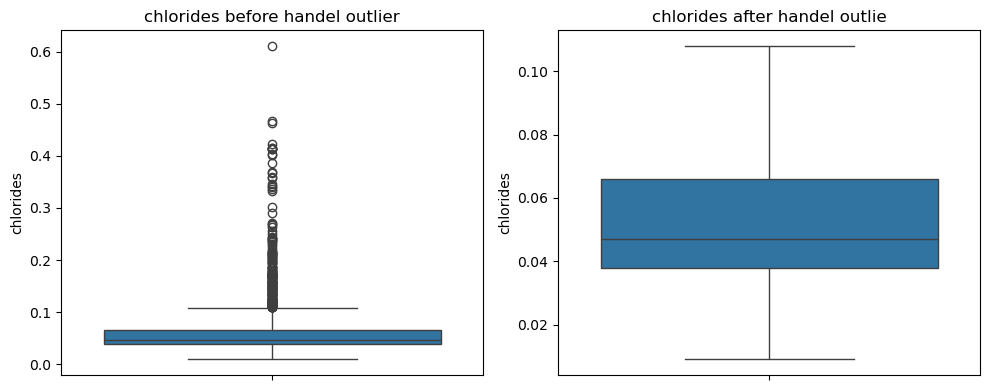

In [35]:
# before handling outliers
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.boxplot(data=dataset, y='chlorides', ax=axs[0])
axs[0].set_title('chlorides before handel outlier')

# Handle chlorides column
# Step 1: Remove maximum outliers
indices = dataset['chlorides'].nlargest(1).index
dataset = dataset.drop(indices)

# Step 2: Calculate IQR and cap other outliers
Q1 = dataset['chlorides'].quantile(0.25)
Q3 = dataset['chlorides'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values outside the bounds
dataset.loc[dataset['chlorides'] < lower_bound, 'chlorides'] = lower_bound
dataset.loc[dataset['chlorides'] > upper_bound, 'chlorides'] = upper_bound

# after handling outliers
sns.boxplot(data=dataset, y='chlorides', ax=axs[1])
axs[1].set_title('chlorides after handel outlie')

plt.tight_layout()
plt.show()

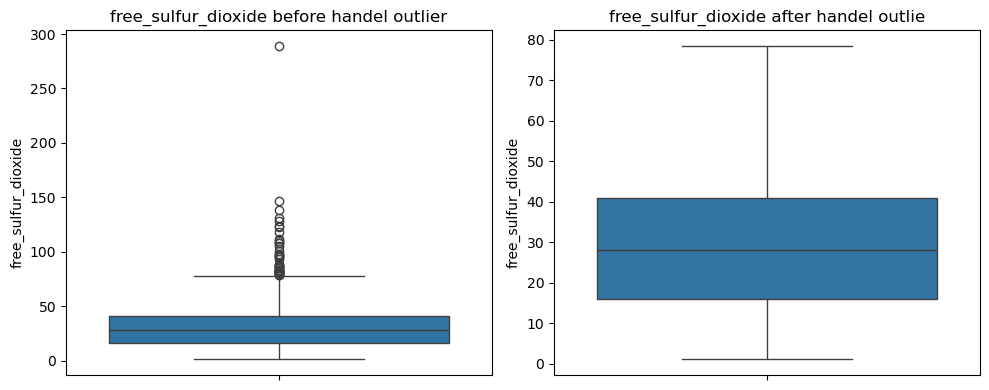

In [36]:
# before handling outliers
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.boxplot(data=dataset, y='free_sulfur_dioxide', ax=axs[0])
axs[0].set_title('free_sulfur_dioxide before handel outlier')

# Handle free_sulfur_dioxide column
# Step 1: Remove maximum outliers
indices = dataset['free_sulfur_dioxide'].nlargest(1).index
dataset = dataset.drop(indices)

# Step 2: Calculate IQR and cap other outliers
Q1 = dataset['free_sulfur_dioxide'].quantile(0.25)
Q3 = dataset['free_sulfur_dioxide'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values outside the bounds
dataset.loc[dataset['free_sulfur_dioxide'] < lower_bound, 'free_sulfur_dioxide'] = lower_bound
dataset.loc[dataset['free_sulfur_dioxide'] > upper_bound, 'free_sulfur_dioxide'] = upper_bound

# after handling outliers
sns.boxplot(data=dataset, y='free_sulfur_dioxide', ax=axs[1])
axs[1].set_title('free_sulfur_dioxide after handel outlie')

plt.tight_layout()
plt.show()

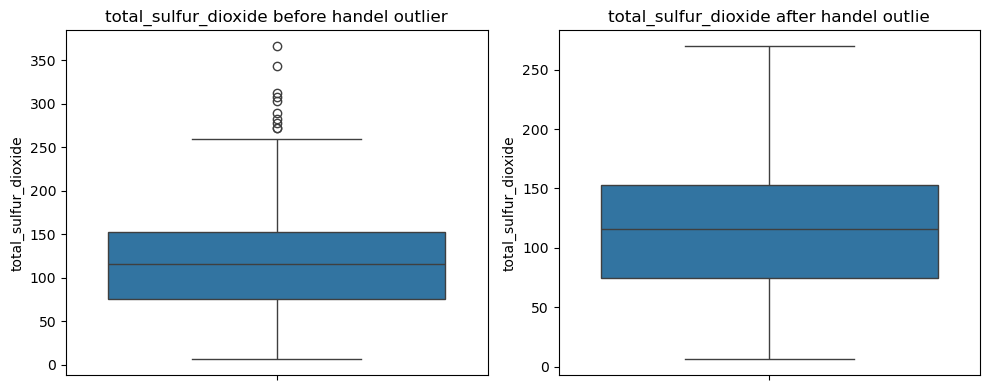

In [37]:
# before handling outliers
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.boxplot(data=dataset, y='total_sulfur_dioxide', ax=axs[0])
axs[0].set_title('total_sulfur_dioxide before handel outlier')

# Handle total_sulfur_dioxide column
# Step 1: Remove maximum 2 outliers
indices = dataset['total_sulfur_dioxide'].nlargest(2).index
dataset = dataset.drop(indices)

# Step 2: Calculate IQR and cap other outliers
Q1 = dataset['total_sulfur_dioxide'].quantile(0.25)
Q3 = dataset['total_sulfur_dioxide'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values outside the bounds
dataset.loc[dataset['total_sulfur_dioxide'] < lower_bound, 'total_sulfur_dioxide'] = lower_bound
dataset.loc[dataset['total_sulfur_dioxide'] > upper_bound, 'total_sulfur_dioxide'] = upper_bound

# after handling outliers
sns.boxplot(data=dataset, y='total_sulfur_dioxide', ax=axs[1])
axs[1].set_title('total_sulfur_dioxide after handel outlie')

plt.tight_layout()
plt.show()

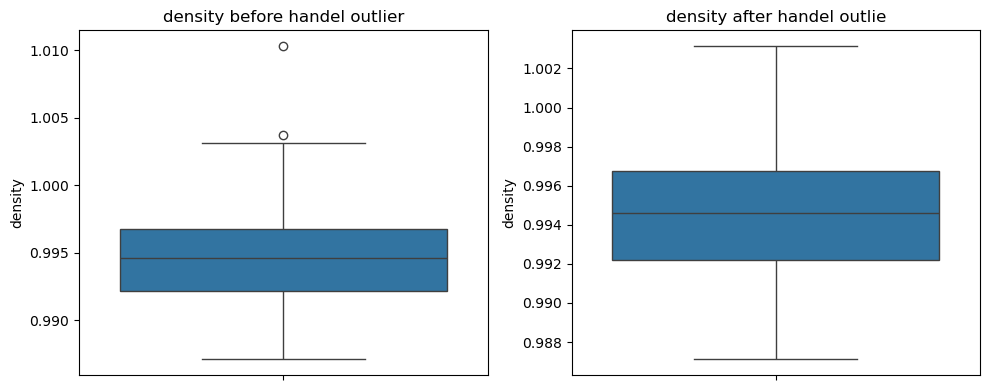

In [38]:
# before handling outliers
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.boxplot(data=dataset, y='density', ax=axs[0])
axs[0].set_title('density before handel outlier')

# Handle density column
# Remove maximum 2 outliers
indices = dataset['density'].nlargest(2).index
dataset = dataset.drop(indices)

# after handling outliers
sns.boxplot(data=dataset, y='density', ax=axs[1])
axs[1].set_title('density after handel outlie')

plt.tight_layout()
plt.show()

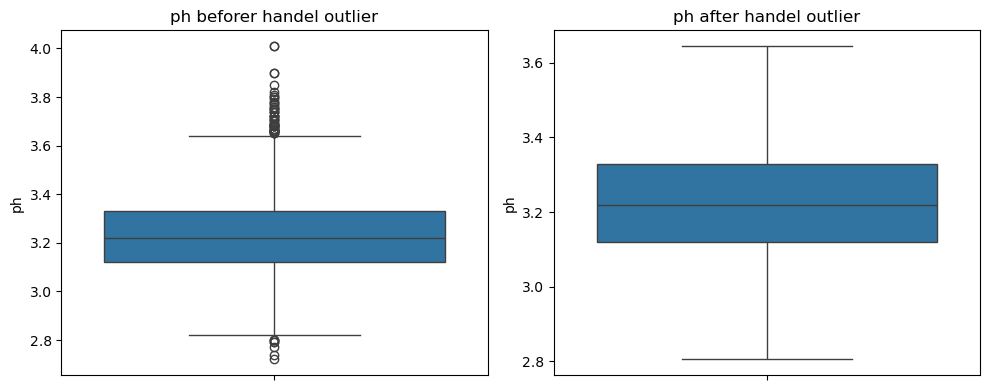

In [39]:
# before handling outliers
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.boxplot(data=dataset, y='ph', ax=axs[0])
axs[0].set_title('ph beforer handel outlier')

# Handle ph column
# Calculate IQR and cap other outliers
Q1 = dataset['ph'].quantile(0.25)
Q3 = dataset['ph'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values outside the bounds
dataset.loc[dataset['ph'] < lower_bound, 'ph'] = lower_bound
dataset.loc[dataset['ph'] > upper_bound, 'ph'] = upper_bound

# after handling outliers
sns.boxplot(data=dataset, y='ph', ax=axs[1])
axs[1].set_title('ph after handel outlier')

plt.tight_layout()
plt.show()

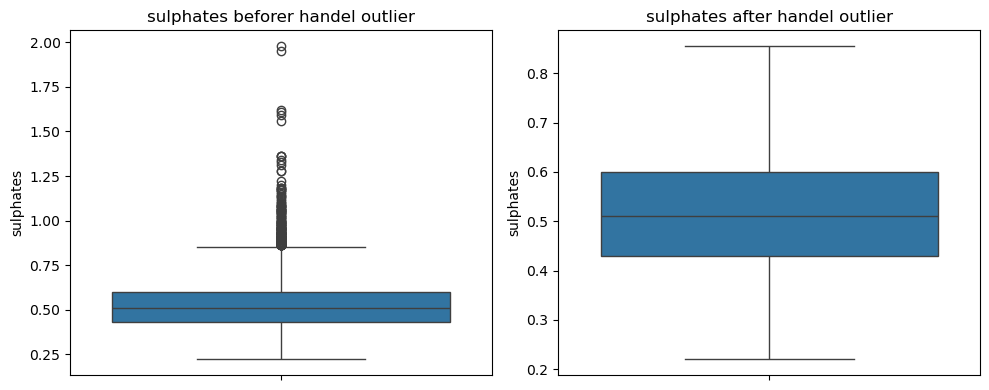

In [40]:
# before handling outliers
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.boxplot(data=dataset, y='sulphates', ax=axs[0])
axs[0].set_title('sulphates beforer handel outlier')

# Handle sulphates column
# Calculate IQR and cap other outliers
Q1 = dataset['sulphates'].quantile(0.25)
Q3 = dataset['sulphates'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values outside the bounds
dataset.loc[dataset['sulphates'] < lower_bound, 'sulphates'] = lower_bound
dataset.loc[dataset['sulphates'] > upper_bound, 'sulphates'] = upper_bound

# after handling outliers
sns.boxplot(data=dataset, y='sulphates', ax=axs[1])
axs[1].set_title('sulphates after handel outlier')

plt.tight_layout()
plt.show()

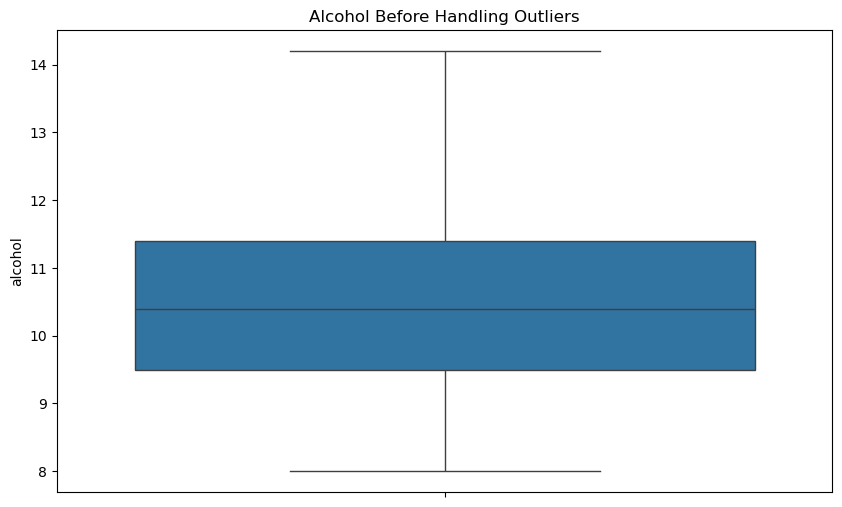

In [41]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, y='alcohol')
plt.title('Alcohol Before Handling Outliers') # 1 outlier deleted in other outlier handeling
plt.show() 


# Data Encoding & Normalization

#### Encoding Categorical Variables "type target column 0 for red , 1 for wight)
##### Why Encode alhough red , white more clear for lable:
###### 1. using strings/nominals "red" and "white" would not be compatible with algorithms based on mathematical computations like (SVM, neural networks)
###### 2. Ensure Compatibility: Make the data compatible with the algorithms
###### 3. Maintain Clarity: Provide clear, unambiguous numerical values that the algorithms can efficiently handle 
" for example "red" might be interpreted as coming before "white" ** doesn't have any meaningful significance in analysis wine data**

In [44]:
# Encode the 'type' column
encoder = LabelEncoder()
dataset['type'] = encoder.fit_transform(dataset['type'])

# Verify the data types
dataset.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                      int32
dtype: object

#### Normalize Features
#####  features contribute equally to the model so improve model performence

In [46]:
# normalize the features in the dataset 
scaler = StandardScaler()
# in some model like SVM depend on distance between point so performed better when the input features are on a similar scale
# so scaling/Normlization for all columns except the last 2 coulmns type and quality
dataset.iloc[:, :-2] = scaler.fit_transform(dataset.iloc[:, :-2])

dataset

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,0.240988,2.302867,-2.277003,-0.723823,1.023852,-1.115012,-1.420598,1.135756,1.819316,0.243606,-0.969819,5,0
1,0.608494,2.302867,-2.277003,-0.559228,2.027696,-0.286986,-0.834159,0.789602,-0.152731,1.160903,-0.632021,5,0
2,0.608494,2.302867,-1.988287,-0.629769,1.753920,-0.878433,-1.065181,0.858833,0.228956,0.931579,-0.632021,5,0
3,2.308210,-0.385234,1.765018,-0.723823,0.978222,-0.760144,-0.958555,1.204987,-0.407189,0.396489,-0.632021,6,0
5,0.240988,2.168462,-2.277003,-0.747336,0.978222,-0.996723,-1.313973,1.135756,1.819316,0.243606,-0.969819,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.861531,-0.855651,-0.183814,-0.794363,-0.664432,-0.346131,-0.389888,-1.169635,0.292570,-0.215043,0.550273,6,1
6493,-0.494025,-0.116424,0.321439,0.710504,-0.299398,1.605645,0.960698,0.131907,-0.470803,-0.520809,-0.800920,5,1
6494,-0.585901,-0.654044,-0.905603,-0.888418,-0.573173,0.008737,-0.052241,-0.685018,-1.488633,-0.520809,-0.969819,6,1
6495,-1.504667,-0.318031,-0.111635,-0.911931,-1.440130,-0.582710,-0.070012,-2.017714,0.737871,-1.132340,1.901465,7,1


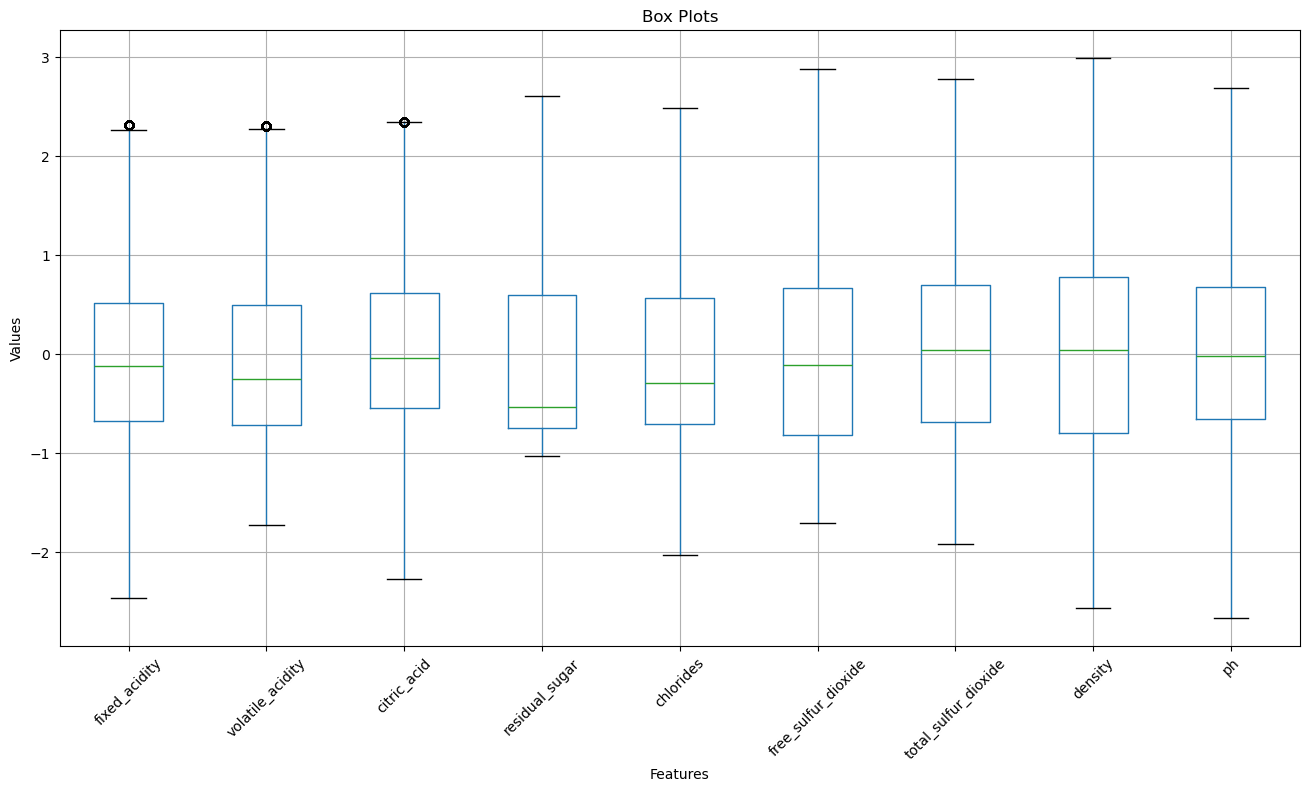

In [47]:
# Select all numerical columns except the last two
columns_to_plot = dataset.select_dtypes(include=['float64']).iloc[:, :-2]

# Create a single boxplot for the selected columns
plt.figure(figsize=(16, 8))
columns_to_plot.boxplot()
plt.title('Box Plots')
plt.xticks(rotation=45)  #  better readability
plt.ylabel('Values')
plt.xlabel('Features')
plt.show()

## Split the Data 
#### for training the model and evaluating its performance

In [49]:
from sklearn.model_selection import train_test_split as tts #for siplit data

# Split data into features"attribute leran model based on" and target "lable"
features = dataset.drop('quality', axis=1)
label = dataset['quality']


# Encode the target labels
label_encoded = encoder.fit_transform(label)

# Split data into training and testing sets
features_train, features_test, label_train, label_test = tts(features, label_encoded, test_size=0.3, random_state=42)
#random_state to get same results each time you run code 42 not fixed but commenly used "after reserach"

### Support Vector Machine (SVM) Classifier

In [51]:
from sklearn.svm import SVC # SVM classifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score # needed function to use

#  model Construction Step -  train the SVM classifierc
svm = SVC(probability=True, random_state=42)  # SVM classifier with probability
svm.fit(features_train, label_train)  # train the classifier using the training data
predict = svm.predict(features_test)  # predict the labels for the test data

# Model Usage Step - test the SVM classifier

# Calculate accuracy "compare actual and predicted labels"
# Accuracy = (TP + TN) / (TP + TN + FP + FN) or ALL
svm_accuracy = accuracy_score(label_test, predict)

# Calculate the F1-Score
# F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)
# Averages the scores, weighted by the number of true instances for each class
svm_f1 = f1_score(label_test, predict, average='weighted')  

# Calculate the ROC AUC, one-vs-one strategy
# ROC AUC: Area Under the Receiver Operating Characteristic Curve
# Computes the ROC AUC score for each class using the One-vs-Rest strategy.
# Averages the scores across all classes.
svm_roc_auc = roc_auc_score(label_test, svm.predict_proba(features_test), multi_class='ovr')

# results
print(f'Support Vector Machine (SVM) Classifier - Accuracy: {svm_accuracy * 100:.2f}%')
print(f'Support Vector Machine (SVM) Classifier - F1-Score: {svm_f1 * 100:.2f}%')
print(f'Support Vector Machine (SVM) Classifier - ROC/AUC: {svm_roc_auc * 100:.2f}%')

Support Vector Machine (SVM) Classifier - Accuracy: 56.25%
Support Vector Machine (SVM) Classifier - F1-Score: 52.59%
Support Vector Machine (SVM) Classifier - ROC/AUC: 79.19%


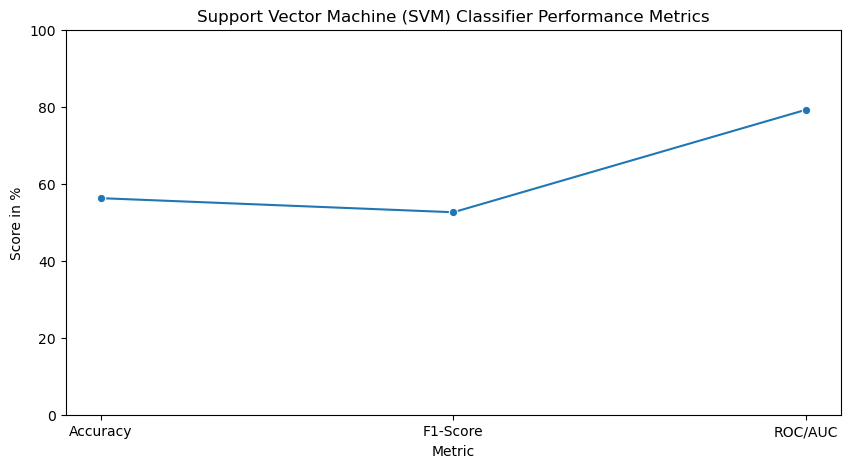

In [52]:
# Create a line plot for SVM metrics
plt.figure(figsize=(10, 5))
sns.lineplot(x=['Accuracy', 'F1-Score', 'ROC/AUC'], y=[svm_accuracy * 100, svm_f1 * 100, svm_roc_auc * 100], marker='o')
plt.title('Support Vector Machine (SVM) Classifier Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score in %')
plt.ylim(0, 100) 
plt.show()

### XGBoost Classifier

In [54]:
!pip install xgboost

In [55]:
import xgboost
print(xgboost.__version__)

2.1.3


In [56]:
from xgboost import XGBClassifier

#  model Construction Step -  train the xGboost Classifier
xgb = XGBClassifier(random_state=42, enable_categorical=True)
xgb.fit(features_train, label_train)
predict = xgb.predict(features_test)

# model Usage Step - test the XGboost Classifier
xgboost_accuracy = accuracy_score(label_test, predict)
xgboost_f1 = f1_score(label_test, predict, average='weighted') 
xgboost_roc_auc = roc_auc_score(label_test, xgb.predict_proba(features_test), multi_class='ovr') 

# results
print(f'XGBoost Classifier - Accuracy: {xgboost_accuracy * 100:.2f}%')
print(f'XGBoost Classifier - F1-Score: {xgboost_f1 * 100:.2f}%')
print(f'XGBoost Classifier - ROC/AUC: {xgboost_roc_auc * 100:.2f}%')

XGBoost Classifier - Accuracy: 54.05%
XGBoost Classifier - F1-Score: 52.51%
XGBoost Classifier - ROC/AUC: 73.88%


### Random Forest Classifier (with 50 estimators)

In [58]:
from sklearn.ensemble import RandomForestClassifier

#  model Construction Step -  train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(features_train, label_train)
predict = rf.predict(features_test)

# model Usage Step - test the Random Forest classifier
rforest_accuracy = accuracy_score(label_test, predict)
rforest_f1 = f1_score(label_test, predict, average='weighted') 
rforest_roc_auc= roc_auc_score(label_test, rf.predict_proba(features_test),multi_class='ovr') 

# results
print(f'Random Forest Classifier - Accuracy: {rforest_accuracy * 100:.2f}%')
print(f'Random Forest Classifier - F1-Score: {rforest_f1 * 100:.2f}%')
print(f'Random Forest Classifier - ROC/AUC: {rforest_roc_auc * 100:.2f}%')

Random Forest Classifier - Accuracy: 56.18%
Random Forest Classifier - F1-Score: 53.96%
Random Forest Classifier - ROC/AUC: 73.44%


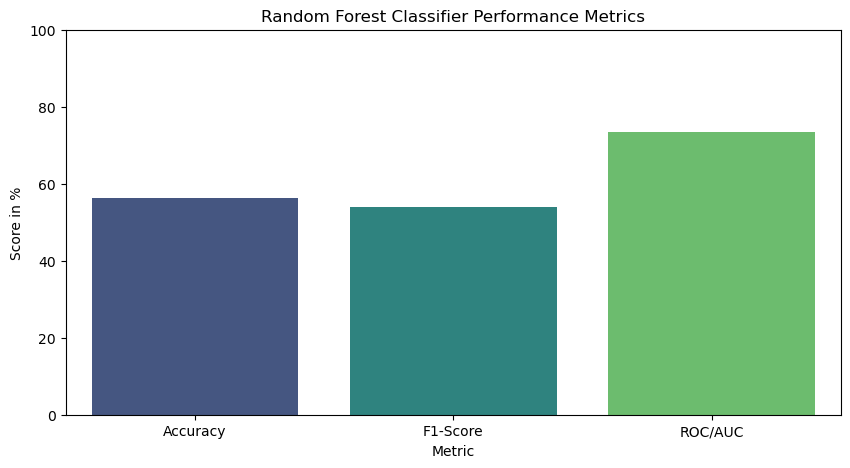

In [59]:
metrics = ['Accuracy', 'F1-Score', 'ROC/AUC']

# Create a bar plot for Random Forest Classifier metrics
plt.figure(figsize=(10, 5))
sns.barplot(x=metrics, y= [rforest_accuracy * 100, rforest_f1 * 100, rforest_roc_auc * 100], hue=metrics, palette='viridis')
plt.title('Random Forest Classifier Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score in %')
plt.ylim(0, 100)
plt.show()

### Multilayer Perceptron (MLP) Classifier

In [61]:
from sklearn.neural_network import MLPClassifier

#  model Construction Step -  train the MLP classifier with 22 hidden neurons in one layer
mlp = MLPClassifier(hidden_layer_sizes=(22,), max_iter=1000, random_state=42) 
# max_iter=1000, algorithm will run for up to 1000 iterations
#hidden_layer_sizes=(22,) means that the neural network has one hidden layer with 22 neurons 
# using a single hidden layer with 22 neurons make a balance between simplicity and complexity
# making it a suitable choice for many machine learning tasks

mlp.fit(features_train, label_train)
predict = mlp.predict(features_test)
# model Usage Step - test the MLP classifier
mlp_accuracy = accuracy_score(label_test, predict)
mlp_f1 = f1_score(label_test, predict , average='weighted') 
mlp_roc_auc = roc_auc_score(label_test, mlp.predict_proba(features_test), multi_class='ovr') 

# results
print(f'Multilayer Perceptron (MLP) Classifie - Accuracy: {mlp_accuracy * 100:.2f}%')
print(f'Multilayer Perceptron (MLP) Classifie - F1-Score: {mlp_f1 * 100:.2f}%')
print(f'Multilayer Perceptron (MLP) Classifie - ROC/AUC: {mlp_roc_auc * 100:.2f}%')

Multilayer Perceptron (MLP) Classifie - Accuracy: 54.99%
Multilayer Perceptron (MLP) Classifie - F1-Score: 53.21%
Multilayer Perceptron (MLP) Classifie - ROC/AUC: 75.78%


## Comparing Results

In [63]:
#  results
results = pd.DataFrame({
    'Classifier': ['SVM', 'XGBoost', 'Random Forest', 'MLP'],
    'Accuracy': [svm_accuracy * 100, xgboost_accuracy * 100, rforest_accuracy * 100, mlp_accuracy * 100],
    'F1-Score': [svm_f1 * 100, xgboost_f1 * 100, rforest_f1 * 100, mlp_f1 * 100],
    'ROC/AUC': [svm_roc_auc * 100, xgboost_roc_auc * 100, rforest_roc_auc * 100, mlp_roc_auc * 100]
})

results

,Classifier,Accuracy,F1-Score,ROC/AUC
0,SVM,56.246077,52.594025,79.189336
1,XGBoost,54.048964,52.513349,73.880286
2,Random Forest,56.183302,53.955581,73.443391
3,MLP,54.990584,53.209041,75.778663


In [64]:
# Melt the DataFrame for easier plotting
# The melt function transforms the results DataFrame into a long-format DataFrame (results_melted) that is easier to use for plotting
# id_vars='Classifier' keeps the Classifier column 
# var_name='Metric' creates a  column to store the metric types (Accuracy, F1-Score, ROC/AUC)
# value_name='Score' creates a column to store the values.
results_melted = results.melt(id_vars='Classifier', var_name='Metric', value_name='Score')

results_melted

,Classifier,Metric,Score
0,SVM,Accuracy,56.246077
1,XGBoost,Accuracy,54.048964
2,Random Forest,Accuracy,56.183302
3,MLP,Accuracy,54.990584
4,SVM,F1-Score,52.594025
5,XGBoost,F1-Score,52.513349
6,Random Forest,F1-Score,53.955581
7,MLP,F1-Score,53.209041
8,SVM,ROC/AUC,79.189336
9,XGBoost,ROC/AUC,73.880286


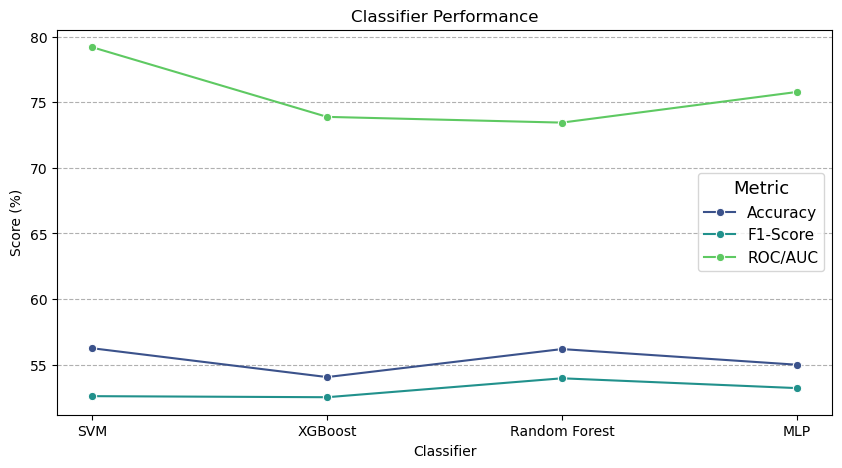

In [65]:
# Plot the results
plt.figure(figsize=(10, 5))
sns.lineplot(x='Classifier', y='Score', hue='Metric', data=results_melted, marker='o', palette='viridis')
plt.title('Classifier Performance')
plt.xlabel('Classifier')
plt.ylabel('Score (%)')
plt.legend(title='Metric', title_fontsize='13', fontsize='11')
plt.grid(axis='y', linestyle='--')
plt.show()

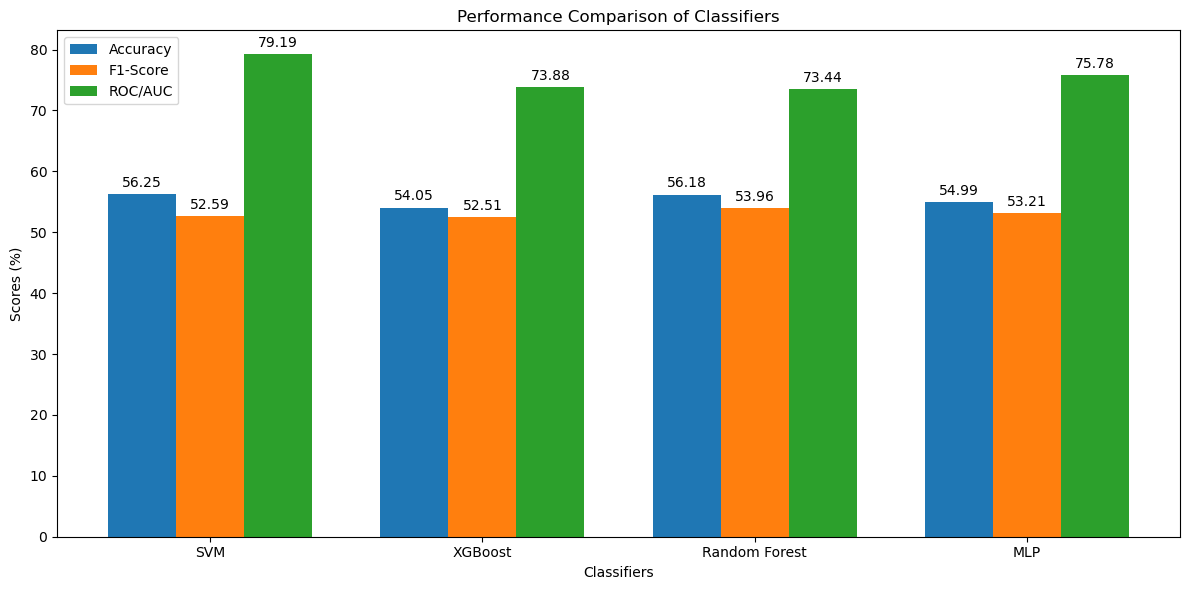

In [118]:
# Performance metrics
classifiers = ['SVM', 'XGBoost', 'Random Forest', 'MLP']
accuracy = [56.25, 54.05, 56.18, 54.99]
f1_score = [52.59, 52.51, 53.96, 53.21]
roc_auc = [79.19, 73.88, 73.44, 75.78]

# Plotting
x = np.arange(len(classifiers))  # label locations
width = 0.25  # width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x, f1_score, width, label='F1-Score')
rects3 = ax.bar(x + width, roc_auc, width, label='ROC/AUC')

# Adding text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores (%)')
ax.set_title('Performance Comparison of Classifiers')
ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.legend()

# Adding value labels on the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords='offset points',
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.tight_layout()
plt.show()
